In [ ]:
import os
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/crack.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/crack.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!unzip gdrive/My\ Drive/data/crack.zip

unzip:  cannot find or open gdrive/My Drive/data/crack.zip, gdrive/My Drive/data/crack.zip.zip or gdrive/My Drive/data/crack.zip.ZIP.


In [ ]:
!unzip gdrive/My\ Drive/data/train.zip > /dev/null

unzip:  cannot find or open gdrive/My Drive/data/train.zip, gdrive/My Drive/data/train.zip.zip or gdrive/My Drive/data/train.zip.ZIP.


In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/crack/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/crack/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 32000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/crack/train'
val_dir = '/content/crack/test'

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, Dense

def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x




In [ ]:
def create_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial convolution layer
    x = resnet_block(inputs, filters=64, kernel_size=7, strides=2)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)

    x = resnet_block(x, filters=128, kernel_size=3, strides=2)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = resnet_block(x, filters=256, kernel_size=3, strides=2)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)
    x = resnet_block(x, filters=256, kernel_size=3, strides=1)

    x = resnet_block(x, filters=512, kernel_size=3, strides=2)
    x = resnet_block(x, filters=512, kernel_size=3, strides=1)
    x = resnet_block(x, filters=512, kernel_size=3, strides=1)

    # Global average pooling and output layer
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model



In [ ]:
# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 2


In [ ]:
# Create the ResNet model
model = create_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 64)      9472      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        36928 

In [ ]:
test_loss, val_acc = model.evaluate(val_generator, verbose=2)
print('validation accuracy:', val_acc)

250/250 - 26s - loss: 0.6932 - accuracy: 0.5000 - 26s/epoch - 104ms/step
validation accuracy: 0.5


In [ ]:
img_path = "/content/crack/train/Negative/00235.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(prediction)

1/1 [==============================] - 1s 646ms/step
[[0.48140684 0.5185932 ]]


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=20000//500,
    epochs=30,
    validation_data=val_generator,
    validation_steps=20000//500
)


Epoch 1/30
40/40 [==============================] - 21s 165ms/step - loss: 0.3826 - accuracy: 0.9062 - val_loss: 251.7949 - val_accuracy: 0.4805
Epoch 2/30
40/40 [==============================] - 10s 247ms/step - loss: 0.1264 - accuracy: 0.9758 - val_loss: 13.1124 - val_accuracy: 0.4984
Epoch 3/30
40/40 [==============================] - 7s 183ms/step - loss: 0.0571 - accuracy: 0.9852 - val_loss: 12.0591 - val_accuracy: 0.4984
Epoch 4/30
40/40 [==============================] - 7s 169ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 12.3493 - val_accuracy: 0.4930
Epoch 5/30
40/40 [==============================] - 9s 231ms/step - loss: 0.0586 - accuracy: 0.9852 - val_loss: 10.2177 - val_accuracy: 0.4906
Epoch 6/30
40/40 [==============================] - 7s 167ms/step - loss: 0.0480 - accuracy: 0.9836 - val_loss: 13.1110 - val_accuracy: 0.4719
Epoch 7/30
40/40 [==============================] - 7s 188ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 12.9339 - val_accuracy: 0.5

In [ ]:
model.save('/content/crack/resnet.h5')

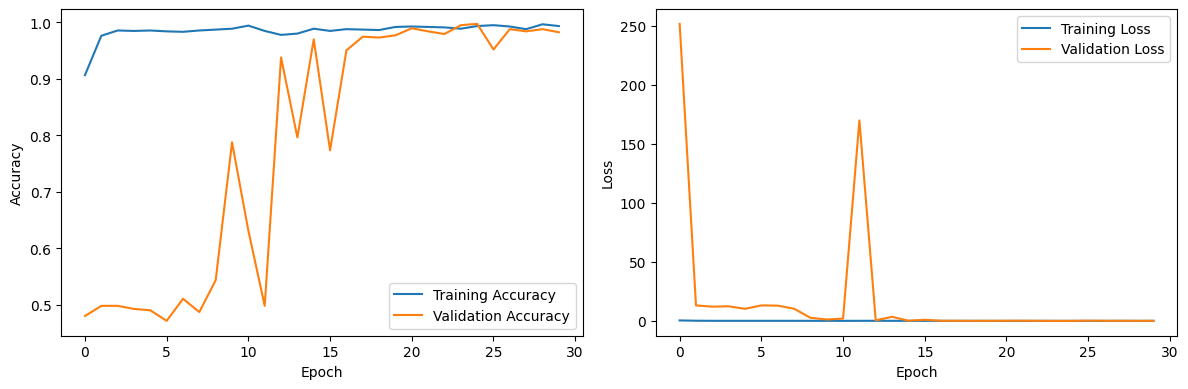

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
